In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import random
import re
from scipy.cluster.hierarchy import ward, dendrogram

In [2]:
#pip install openpyxl
#pip install wordcloud

In [3]:
negativeTweets = pd.read_excel('./data/Tweets_Negative.xlsx',sheet_name="Negative_Tweets",engine='openpyxl')

In [4]:
tweetList = []
for i in range(len(negativeTweets)):
    tweetList += [negativeTweets.iloc[i][0]]
tweetList

['Hey @travelocity and @Delta ... Neither of you will let me change my upcoming flight on your websites and your actual wait time on the phone is 4+ HOURS?!?!? What the actual $#*@?!?!?? This is UNACCEPTABLE #travelocity #delta #fail',
 'Flew into #FortMyers on @delta &amp; flying out on @JetBlue due to timing. 100% missing the @delta experience. #delta #JetBlue',
 'Those afraid to Die, will never truly Live. \n\n#thoseafraidtodie#7fiveclothing #7five #bebadasseveryday #delta #goldtar # @ Gold Star Nutrition https://t.co/BOIjqnCSmb',
 'RT @riskmap_ : Police Arrest Three Suspected Kidnappers, Rescue Victim In #Delta #Nigeria #Security https://t.co/BwhC990aFj https://t.co/NkG1eNbE44',
 "#Delta Sucks. It's a 2 hour hold to change reservation. I'm now 1 hr and 15 minutes in to the hold.  Never will do business with them again!",
 '@Delta so it’s fine for someone to get on one of your flights with a cough, and no one will do anything about it because they clicked the boxes saying they don’t

In [9]:
vectorizer = TfidfVectorizer(stop_words={'english'},max_df=0.8)
X = vectorizer.fit_transform(tweetList)
X

<140x1176 sparse matrix of type '<class 'numpy.float64'>'
	with 3767 stored elements in Compressed Sparse Row format>

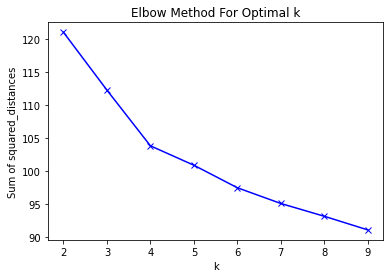

In [6]:
sumofsquareddistance = []
K = range(2,10)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   sumofsquareddistance.append(km.inertia_)
plt.plot(K, sumofsquareddistance, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [7]:
random.seed(22)
idealK = 6
model = KMeans(n_clusters=idealK, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
tweetClusters=pd.DataFrame(list(zip(tweetList,labels)),columns=['tweet','cluster'])
print(tweetClusters.sort_values(by=['cluster']))
tweetClusters.groupby('cluster').count()

                                                 tweet  cluster
96   RT @Kristy91808800 : Another Epidemologist cal...        0
107  RT @Kristy91808800 : Another Epidemologist cal...        0
106  RT @Kristy91808800 : Another Epidemologist cal...        0
112  RT @Kristy91808800 : Another Epidemologist cal...        0
115  RT @Kristy91808800 : Another Epidemologist cal...        0
..                                                 ...      ...
32   All @Delta flights I’ve booked are getting del...        5
31   RT @mkingsle : All @Delta flights I’ve booked ...        5
30   Had flights booked for July with @Delta, but f...        5
48   hours, actually get to speak with someone, and...        5
0    Hey @travelocity and @Delta ... Neither of you...        5

[140 rows x 2 columns]


,tweet
cluster,
0,11
1,35
2,30
3,11
4,10
5,43


Cluster: 0
Tweets
RT @Kristy91808800 : Another Epidemologist call...
RT @Kristy91808800 : Another Epidemologist call...
RT @Kristy91808800 : Another Epidemologist call...
RT @Kristy91808800 : Another Epidemologist call...
RT @Kristy91808800 : Another Epidemologist call...
RT @Kristy91808800 : Another Epidemologist call...
RT @Kristy91808800 : Another Epidemologist call...
RT @Kristy91808800 : Another Epidemologist call...
RT @Kristy91808800 : Another Epidemologist call...
RT @Kristy91808800 : Another Epidemologist call...
Another Epidemologist calls @DrBonnieHenry Dang...


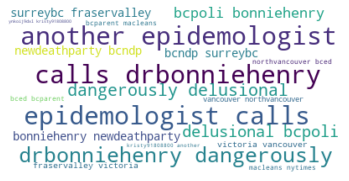

Cluster: 1
Tweets
Flew into #FortMyers on @delta &amp; flying out...
Those afraid to Die, will never truly Live. \n\...
RT @riskmap_ : Police Arrest Three Suspected Ki...
Police arrest three suspected kidnappers, rescu...
Police Arrest Three Suspected Kidnappers, Rescu...
#Results on #April 26\n\n#TechMahindra, #HDFCLi...
RT @tdpel : Okowa Commissions Clean Water Proje...
Okowa Commissions Clean Water Project in Okpana...
Where are the Trijet lovers? 😍\n#delta #deltaai...
RT @NOgnanovich : NEWS: #McConnell in Kentucky ...
Gutted that I’m not at the second round of the ...
A twenty second time lapse of the storm that mo...
RT @tdpel : Delta’s Teacher Development Centre ...
RT @tdpel : Delta’s Teacher Development Centre ...
Delta’s Teacher Development Centre To Train Tea...
First work trip in over a year. #MissionCritica...
General thread about the #Ebro #Delta, seriousl...
Question of the day ; if #airlines are back to ...
RT @RubberNews : The EPA has granted an emergen...
Just working 

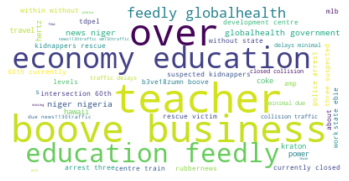

Cluster: 2
Tweets
#MLB #Coke #Delta  Go woke. Go broke.   You've ...
Ethics got #COVID as CEOs got millions but empl...
#Delta #Esquimalt, #DIY #Forklift Operator Trai...
RT @BitPay : BitPay App users in Mexico can now...
Delta A350 taking off from SLC airport   #AvGee...
RT @mxmovement : #Babangida defeated by #Abiola...
RT @LaReeDeFreece : #Delta has us packed on a f...
#Delta has us packed on a flight in a tiny plan...
Catching some AIRbus. Head over to my IG page f...
#DELTA 33-895X RADIAL ARM SAW https://t.co/gCdm...
#DELTA RS-15 SINGLE SPINDLE SHAPER https://t.co...
#DELTA RS-15 SINGLE SPINDLE SHAPER https://t.co...
#DELTA RS-15 SINGLE SPINDLE SHAPER https://t.co...
Check out DELTA DPS-300AB-101 A Hard Disk Recor...
CAUTION LOCAL BC BUSINESSES\n#langley\n#surrey\...
RT @DeepaOfKara : That wasn’t as hard as I thou...
#Delta Air Lines orders 25 additional #Airbus A...
#Delta, #SaintMaurice, #DIY #Forklift Operator ...
RT @DeepaOfKara : That wasn’t as hard as I thou...
RT @TechXplor

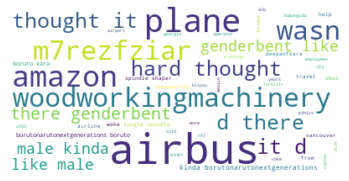

Cluster: 3
Tweets
RT @RealCandaceO : Any corporation telling you ...
RT @RealCandaceO : Any corporation telling you ...
RT @RealCandaceO : Any corporation telling you ...
RT @RealCandaceO : Any corporation telling you ...
RT @RealCandaceO : Any corporation telling you ...
RT @RealCandaceO : Any corporation telling you ...
RT @RealCandaceO : Any corporation telling you ...
RT @RealCandaceO : Any corporation telling you ...
RT @RealCandaceO : Any corporation telling you ...
RT @RealCandaceO : Any corporation telling you ...
RT @RealCandaceO : Any corporation telling you ...


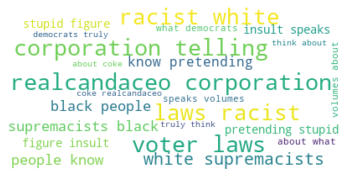

Cluster: 4
Tweets
RT @sassywaifucos : Just waiting to fight the H...
RT @sassywaifucos : Just waiting to fight the H...
RT @sassywaifucos : Just waiting to fight the H...
RT @sassywaifucos : Just waiting to fight the H...
RT @sassywaifucos : Just waiting to fight the H...
RT @sassywaifucos : Just waiting to fight the H...
RT @sassywaifucos : Just waiting to fight the H...
RT @sassywaifucos : Just waiting to fight the H...
RT @sassywaifucos : Just waiting to fight the H...
Just waiting to fight the Hokage like...⏰\n\nHe...


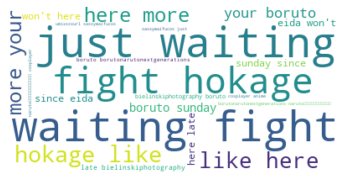

Cluster: 5
Tweets
Hey @travelocity and @Delta ... Neither of you ...
#Delta Sucks. It's a 2 hour hold to change rese...
@Delta so it’s fine for someone to get on one o...
RT @kmarshford55 : #DELTA customer service is k...
RT @Ihufffreon : Bought a ticket from #Delta  f...
Bought a ticket from #Delta  for July. They the...
RT @kmarshford55 : #DELTA customer service is k...
#DELTA customer service is killing me today.  C...
@Delta wanna change my flight and cut my vacati...
Spent over 3 hours today waiting for a rep at @...
....required to be 10 weeks old. Kevin at the c...
I’ve never experienced worse customer service t...
@Delta Dear #Delta , I’m crushed💔\nWhy hang up ...
Don’t fly #delta. We had a delayed flight out o...
Had flights booked for July with @Delta, but fo...
RT @mkingsle : All @Delta flights I’ve booked a...
All @Delta flights I’ve booked are getting dela...
@Delta do you require a negative Covid test for...
2nd flight 2nd delay been tryna get out Miami f...
Really @Delta

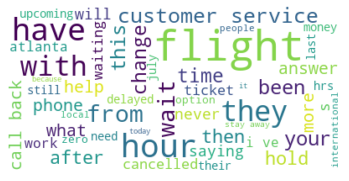

In [8]:
result=pd.DataFrame({'Cluster':labels,'Tweets':tweetList})
for k in range(0,idealK):
    s=result[result.Cluster==k]
    text=s['Tweets'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in re.split(r"[-;,\s]\s*",text) \
                  if word not in ['delta','deltaairlines','#delta','@delta','@deltaairlines','https','t','co'] and len(word) > 3 ])

    #print(text)
    #smallwords = [word for word in text.split() if len(word) < 4] 
    #print("smallwords", smallwords)
    exclude = ['delta','deltaairlines','#delta','@delta','@deltaairlines','https','t','co','that']
    wordcloud = WordCloud(stopwords=exclude,max_font_size=50, max_words=50,background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    print('Tweets')
    tweets=tweetClusters[tweetClusters.cluster==k]['tweet']         
    print(tweets.to_string(index=False))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

## Part 2

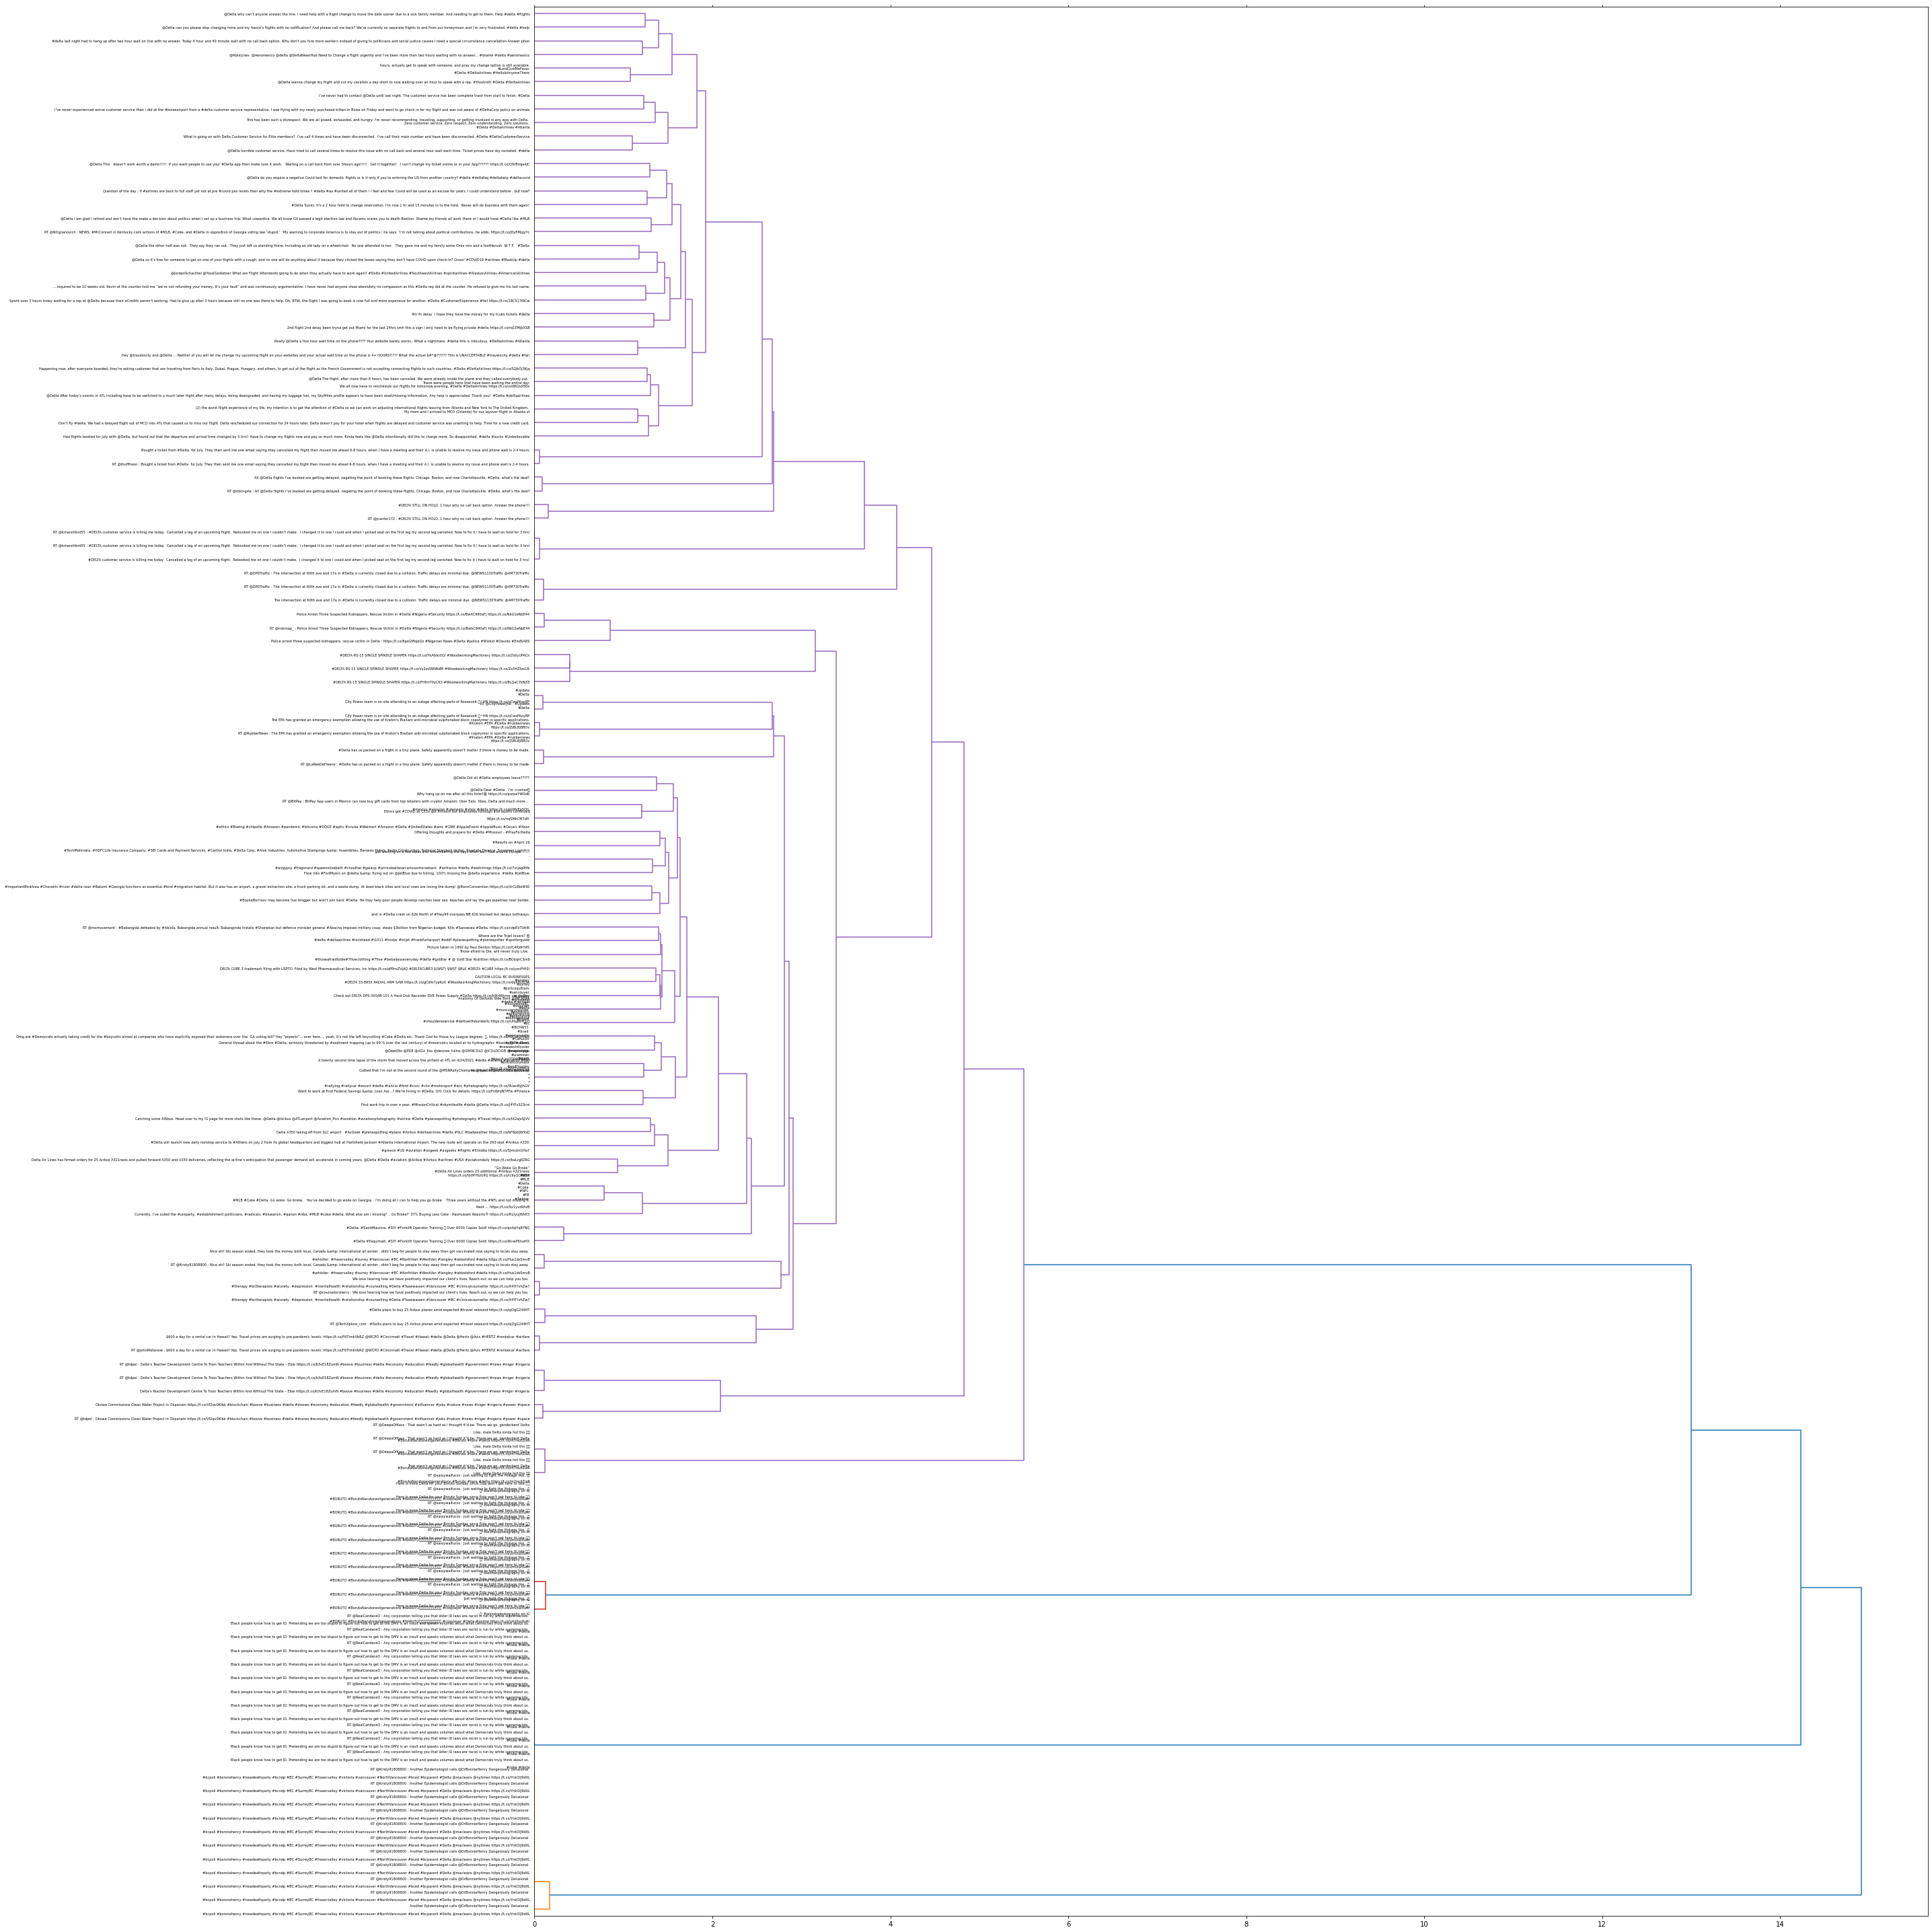

In [26]:
len(vectorizer.get_feature_names())

dist = 1 - cosine_similarity(X)
cosine_similarity(X)
dist


linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(40, 40)) # set size


ax = dendrogram(linkage_matrix, orientation="right", labels=tweetList);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

In [24]:
tweetList

['Hey @travelocity and @Delta ... Neither of you will let me change my upcoming flight on your websites and your actual wait time on the phone is 4+ HOURS?!?!? What the actual $#*@?!?!?? This is UNACCEPTABLE #travelocity #delta #fail',
 'Flew into #FortMyers on @delta &amp; flying out on @JetBlue due to timing. 100% missing the @delta experience. #delta #JetBlue',
 'Those afraid to Die, will never truly Live. \n\n#thoseafraidtodie#7fiveclothing #7five #bebadasseveryday #delta #goldtar # @ Gold Star Nutrition https://t.co/BOIjqnCSmb',
 'RT @riskmap_ : Police Arrest Three Suspected Kidnappers, Rescue Victim In #Delta #Nigeria #Security https://t.co/BwhC990aFj https://t.co/NkG1eNbE44',
 "#Delta Sucks. It's a 2 hour hold to change reservation. I'm now 1 hr and 15 minutes in to the hold.  Never will do business with them again!",
 '@Delta so it’s fine for someone to get on one of your flights with a cough, and no one will do anything about it because they clicked the boxes saying they don’t